In [231]:
import nba_data as nba
import pandas as pd
import numpy as np

In [279]:
df = nba.run_all(startYear=2019, endYear=2021)

In [280]:
df.shape

(1510, 30)

In [281]:
df = nba.keep_features(df)

In [282]:
df.head()

,Loc,Outcome,R_TeamPtsFor,R_TeamPtsFor,R_TeamWinPct,R_TeamWinPct,R_OppPtsFor,R_OppPtsFor,R_OppWinPct,R_OppWinPct,...,2018-2019_TeamWinPct,2019-2020_TeamPtsFor,2019-2020_TeamPtsAllowed,2019-2020_TeamWinPct,2018-2019_OppPtsFor,2018-2019_OppPtsAllowed,2018-2019_OppWinPct,2019-2020_OppPtsFor,2019-2020_OppPtsAllowed,2019-2020_OppWinPct
140,1,1,106.9,106.9,0.5,0.5,111.3,111.3,0.6,0.6,...,0.648148,113.239130,107.586957,0.695652,105.071429,114.696429,0.267857,107.804348,115.913043,0.304348
141,1,0,112.2,112.2,0.7,0.7,97.7,97.7,0.3,0.3,...,0.574074,110.022222,110.355556,0.444444,108.690909,105.163636,0.581818,109.217391,108.543478,0.586957
147,1,1,117.1,117.1,0.6,0.6,100.5,100.5,0.7,0.7,...,0.500000,110.847826,112.217391,0.434783,102.232143,106.500000,0.321429,114.042553,112.212766,0.574468
150,1,1,114.4,114.4,0.4,0.4,110.0,110.0,0.6,0.6,...,0.428571,114.574468,119.148936,0.382979,108.527273,117.454545,0.236364,111.723404,114.297872,0.382979
152,1,1,108.6,108.6,0.6,0.6,103.2,103.2,0.3,0.3,...,0.696429,117.222222,114.333333,0.600000,113.127273,109.690909,0.618182,113.930233,115.209302,0.465116


In [283]:
df.describe()

,Loc,Outcome,R_TeamPtsFor,R_TeamPtsFor,R_TeamWinPct,R_TeamWinPct,R_OppPtsFor,R_OppPtsFor,R_OppWinPct,R_OppWinPct,...,2018-2019_TeamWinPct,2019-2020_TeamPtsFor,2019-2020_TeamPtsAllowed,2019-2020_TeamWinPct,2018-2019_OppPtsFor,2018-2019_OppPtsAllowed,2018-2019_OppWinPct,2019-2020_OppPtsFor,2019-2020_OppPtsAllowed,2019-2020_OppWinPct
count,1353.0,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,...,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,1.0,0.559497,111.508278,111.508278,0.494087,0.494087,111.545824,111.545824,0.495196,0.495196,...,0.499233,111.906456,111.924182,0.499958,111.218575,111.226938,0.499710,111.890403,111.827000,0.501304
std,0.0,0.496631,5.670207,5.670207,0.205819,0.205819,5.288429,5.288429,0.210098,0.210098,...,0.152977,3.698563,3.713483,0.155470,4.278556,3.953499,0.151175,3.745435,3.662329,0.155533
min,1.0,0.000000,94.800000,94.800000,0.000000,0.000000,96.500000,96.500000,0.000000,0.000000,...,0.132075,101.636364,106.422222,0.195652,102.232143,103.890909,0.132075,101.636364,106.422222,0.195652
25%,1.0,0.000000,107.900000,107.900000,0.300000,0.300000,107.800000,107.800000,0.300000,0.300000,...,0.400000,109.217391,108.777778,0.361702,107.660714,108.203704,0.400000,109.217391,108.777778,0.361702
50%,1.0,1.000000,112.000000,112.000000,0.500000,0.500000,111.400000,111.400000,0.500000,0.500000,...,0.500000,112.911111,110.681818,0.488889,112.870370,111.509434,0.500000,112.404255,110.404255,0.489362
75%,1.0,1.000000,115.600000,115.600000,0.600000,0.600000,115.000000,115.000000,0.600000,0.600000,...,0.634615,114.042553,114.444444,0.625000,114.309091,114.381818,0.634615,114.042553,114.444444,0.625000
max,1.0,1.000000,129.100000,129.100000,1.000000,1.000000,126.800000,126.800000,1.000000,1.000000,...,0.750000,117.933333,120.000000,0.800000,118.245283,119.148148,0.750000,117.933333,120.000000,0.800000


In [284]:
X = df[[col for col in df.columns if col!='Outcome']]
y = df['Outcome']

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [287]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.6107594936708861

[Text(167.4, 181.2, 'X[28] <= 0.581\ngini = 0.49\nsamples = 405\nvalue = [174, 231]'),
 Text(83.7, 108.72, 'X[19] <= 0.578\ngini = 0.444\nsamples = 240\nvalue = [80, 160]'),
 Text(41.85, 36.23999999999998, 'gini = 0.483\nsamples = 157\nvalue = [64, 93]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.311\nsamples = 83\nvalue = [16, 67]'),
 Text(251.10000000000002, 108.72, 'X[22] <= 0.45\ngini = 0.49\nsamples = 165\nvalue = [94, 71]'),
 Text(209.25, 36.23999999999998, 'gini = 0.356\nsamples = 69\nvalue = [53, 16]'),
 Text(292.95, 36.23999999999998, 'gini = 0.489\nsamples = 96\nvalue = [41, 55]')]

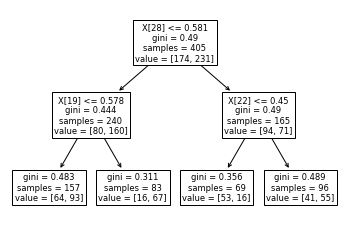

In [288]:
plot_tree(clf)

In [289]:
clf = RandomForestClassifier(n_estimators=50, max_depth=2)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.6318565400843882

In [290]:
proba = clf.predict_proba(X_test)

In [291]:
predict = clf.predict(X_test)

In [293]:
arr2 = np.hsplit(proba, 2)

In [296]:
arr = np.stack((y_test, predict, arr2[0].flatten(), arr2[1].flatten()), axis=1)

In [297]:
arr

array([[1.        , 0.        , 0.52795692, 0.47204308],
       [1.        , 1.        , 0.33501644, 0.66498356],
       [1.        , 0.        , 0.57653061, 0.42346939],
       ...,
       [1.        , 1.        , 0.26762769, 0.73237231],
       [1.        , 0.        , 0.5508399 , 0.4491601 ],
       [1.        , 1.        , 0.30222827, 0.69777173]])

In [298]:
df_result = pd.DataFrame(arr, columns=['actual', 'predict', '0', '1'])

In [299]:
df_result.head()

,actual,predict,0,1
0,1.0,0.0,0.527957,0.472043
1,1.0,1.0,0.335016,0.664984
2,1.0,0.0,0.576531,0.423469
3,1.0,1.0,0.439980,0.560020
4,0.0,0.0,0.630513,0.369487


In [300]:
def greater(x):
    if x[0] > x[1]:
        return x[0]
    else:
        return x[1]

def validation(x):
    if x[0]==x[1]:
        return 1
    else:
        return 0

In [301]:
df_result['confidence'] = df_result[['0','1']].apply(greater, axis=1)
df_result['accuracy'] = df_result[['actual','predict']].apply(validation, axis=1)
df_result['count'] = 1

In [304]:
df_result.sample(10)

,actual,predict,0,1,confidence,accuracy,count
263,0.0,1.0,0.463308,0.536692,0.536692,0,1
728,1.0,1.0,0.385712,0.614288,0.614288,1,1
163,1.0,1.0,0.380783,0.619217,0.619217,1,1
506,1.0,1.0,0.358865,0.641135,0.641135,1,1
662,0.0,1.0,0.372745,0.627255,0.627255,0,1
287,0.0,0.0,0.585847,0.414153,0.585847,1,1
159,1.0,1.0,0.477687,0.522313,0.522313,1,1
119,1.0,1.0,0.425794,0.574206,0.574206,1,1
97,1.0,0.0,0.576328,0.423672,0.576328,0,1
253,1.0,1.0,0.318071,0.681929,0.681929,1,1


In [305]:
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
df_result['5bins'] = pd.qcut(df_result['confidence'], q=5, labels=['1','2','3','4','5'])
df_result['3bins'] = pd.qcut(df_result['confidence'], q=3, labels=['1','2','3'])
df_result['4bins'] = pd.qcut(df_result['confidence'], q=4, labels=['1','2','3','4'])
df_result['10bins'] = pd.qcut(df_result['confidence'], q=10, labels=['1','2','3','4','5','6','7','8','9','10'])

In [307]:
df_result.head()

,actual,predict,0,1,confidence,accuracy,count,5bins,3bins,4bins,10bins
0,1.0,0.0,0.527957,0.472043,0.527957,0,1,1,1,1,2
1,1.0,1.0,0.335016,0.664984,0.664984,1,1,4,3,4,8
2,1.0,0.0,0.576531,0.423469,0.576531,0,1,2,2,2,4
3,1.0,1.0,0.439980,0.560020,0.560020,1,1,2,1,2,3
4,0.0,0.0,0.630513,0.369487,0.630513,1,1,4,2,3,7


In [308]:
df_agg5 = df_result.groupby('5bins').agg({'accuracy':'mean'})
df_agg3 = df_result.groupby('3bins').agg({'accuracy':'mean'})
df_agg4 = df_result.groupby('4bins').agg({'accuracy':'mean'})
df_agg10 = df_result.groupby('10bins').agg({'accuracy':'mean'})

In [309]:
df_agg10

,accuracy
10bins,
1,0.515789
2,0.526316
3,0.515789
4,0.563830
5,0.600000
6,0.652632
7,0.627660
8,0.694737
9,0.791667


In [310]:
df_agg5

,accuracy
5bins,
1,0.521053
2,0.539683
3,0.626316
4,0.661376
5,0.810526


In [312]:
df_agg3

,accuracy
3bins,
1,0.518987
2,0.620253
3,0.756329
